In [1]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

In [2]:
## load dependencie# mathmpy as np  #numeric    
import ast  # dict literal evaluation 
import re   # regular expression 
import matplotlib.pyplot as plt # data visualization
import pytesseract as pt        # Optical Character Recognition 
from pytesseract import Output  # Output format
import spacy    # name entity regognition toolkit
from spacy import displacy  # 
import en_core_web_sm   # language core 
nlp = en_core_web_sm.load() # core of natural language processing
import numpy as np  # math toolkit
import cv2  # visual computation dependecy
import lossrun

In [3]:
## Read txt file as dict more data available (i.e., position, size and level info)
def read_dict(txt_file_path):
    
    # open file 
    txt_file = open(txt_file_path,'r')

    # read data in txt file
    txt_raw = txt_file.read()

    # read the content as dictionary 
    txt_as_dict  = ast.literal_eval(txt_raw)
    
    # close the file
    txt_file.close()
    
    return txt_as_dict

In [4]:
## Read info

#  Read text file 
class_1_yes_a = 'data/txt/madison medical llc loss runs VGM-NO0.txt'

# Read image corresponding to txt file
class_1_yes_a_image = 'data/images/madison medical llc loss runs VGM-NO0.jpg'

# Read as dict format
txt_dict = read_dict(class_1_yes_a)

In [19]:
# load rules
from configobj import ConfigObj

# load configuration file
template_rules = ConfigObj('config_file.ino')

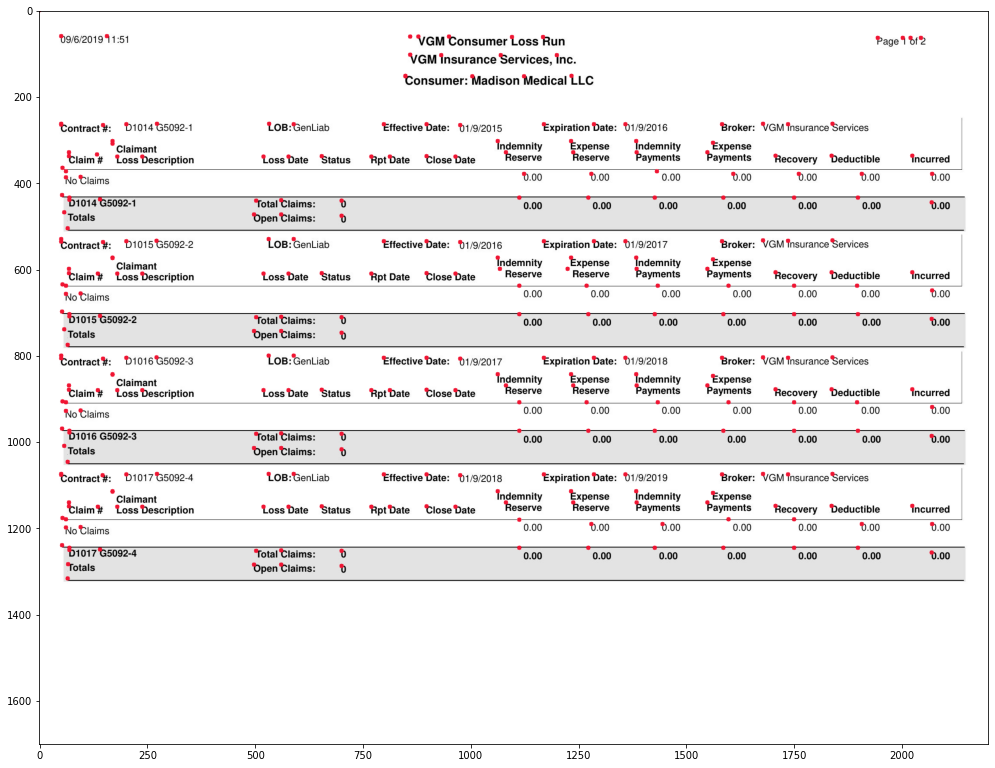

In [6]:
# Extract the sentenses in order to check if the data points are in the text
#
import cv2

# create an all text string
sentences = ' '.join(txt_dict['text']).upper()

# read report image
image_all = cv2.imread(class_1_yes_a_image)

# chek 
for key, item in enumerate(template_rules):

    # Check if data point is in text    
    for i in template_rules[item]:
        if i in sentences:
            for line in range(len(txt_dict['text'])):

                if i in sentences.upper():

                    # draw each word 
                    cv2.circle(image_all, (txt_dict['left'][line], txt_dict['top'][line]),5,(240,20,50),-1)

plt.figure(figsize=(17,30))
plt.imshow(image_all)


In [7]:
## Map the dictionary to string transform

# get subjets in ocr result
import numpy as np
elements = len(txt_dict['text'])
x = np.zeros(shape= (elements,1),dtype = int)
y = np.zeros(shape= (elements,1), dtype = int)
pos = []
string_result = ''
for i in range (elements):
    string_result+= txt_dict['text'][i] + ' '
    pos.append(len(string_result))
    x[i] = txt_dict['left'][i]
    y[i] = txt_dict['top'][i]



In [8]:
string_result_up = string_result.upper()
_pos = pos.index(string_result_up.index('LOSS REPORT'))
print(txt_dict['text'][_pos + 1])

ValueError: substring not found

In [9]:
## TEST CELL, IGNORE IT

# laod image 
_image = cv2.imread(class_1_yes_a_image)

# text to search
data_point = template_rules['loss date'][0]

# find text coords
_index = pos.index(sentences.index(data_point)) + 1

# x , y choords search
x = txt_dict['left'][_index] 
y = txt_dict['top'][_index]

plt.figure(figsize=(14,10))
plt.imshow(cv2.circle(_image,(x,y),10,(0,0,255),-1))

ValueError: substring not found

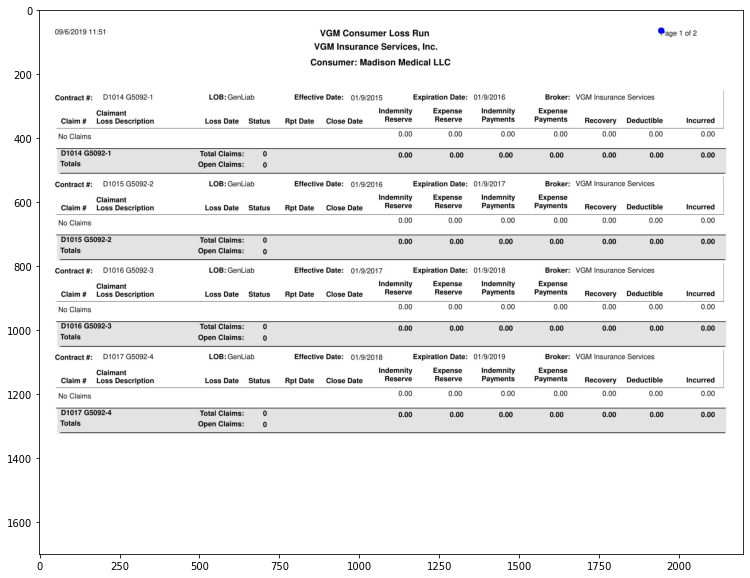

In [10]:
## filter the data points in text

for _,key in enumerate(template_rules):
    for i in range(len(template_rules[key])):
       
        data_point = template_rules[key][i]
        # find text coords
        try:
            _index = pos.index(sentences.index(data_point)) + 1
            # x , y 
            x = txt_dict['left'][_index] 
            y = txt_dict['top'][_index]
            
        except:
            pass 
            
plt.figure(figsize=(14,10))        
plt.imshow(cv2.circle(_image,(x,y),10,(0,0,255),-1))
plt.show()

In [11]:
## Tokenize sentces
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences)
_token = []
for ent in doc.ents:
    _token +=[(ent.text,ent.label_)]
_token
_listX = [0,0]
_listY = [0,0]
_Min_distance = [0,0]
data_point = template_rules['loss date'][0]
_index = pos.index(sentences.index(data_point)) + 1
_listX[0] = (txt_dict['left'][_index])
_listY[0] = (txt_dict['top'][_index])


#for i in range (len(_token)):
#_index = pos.index(sentences.index(data_point)) + 1
#x = txt_dict['left'][_index] 
#y = txt_dict['top'][_index]

ValueError: substring not found

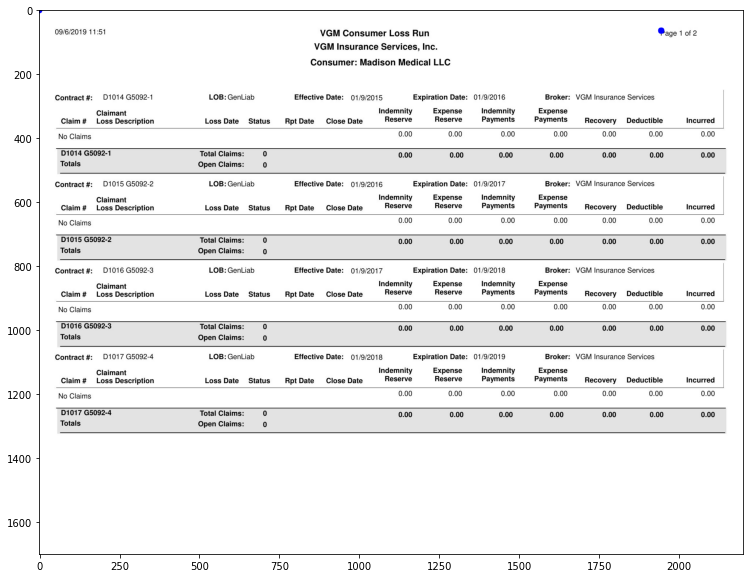

In [12]:
_aux=100000000
for i in range (len(_token)):
    if 'DATE' in _token[i]:
        _index_tuple = pos.index(sentences.index(_token[i][0]))
        _listX[1] = (txt_dict['left'][_index_tuple])
        _listY[1] = (txt_dict['top'][_index_tuple])
        _aux1 = ((_listX[0]-_listX[1])**2 + (_listY[0] - _listY[1])**2)**.5
        if _aux1 < _aux:
            _aux = _aux1
            _Min_distance= [_listX[1], _listY[1]]

plt.figure(figsize=(14,10))
plt.imshow(cv2.circle(_image,(_Min_distance[0],_Min_distance[1]),10,(0,0,255),-1))

# Improve name entities recognition #
## retrain model ##


In [13]:
## test cell 

try: 
    sentences.index(template_rules['expense paid'][0])

except:
    asociate_terms = template_rules['expense paid'][0].split(' ')

    


In [20]:
def search_rules(dictionary, rules):
    
    radius = 200
    # map words possitions in text list
    _, poss = lossrun.map_words(dictionary)

    # Deep copy dictionary 
    _temp_dict = copy.deepcopy(dictionary)


    # convert to uppercase
    _temp_dict['text']= [_temp_dict['text'][i].upper() for i in range(len(_temp_dict['text']))]

    # create the sentences
    sentence = ' '.join(_temp_dict['text'])

    # define the list for results 
    rules_coords = []
    
    # iterate trhougth rules
    for _, item  in enumerate(rules):

        for i in range(len(rules[item])):

            # if there is the entire rule in the text
            if rules[item][i] in sentence:

                # process while rule is in the text
                while rules[item][i] in sentence: 
                    # text 
                        
                    _temp_dict['text'][poss.index(sentence.index(rules[item][i]))+1] = '?' * len(_temp_dict['text'][poss.index(sentence.index(rules[item][i]))+1])
                    rules_coords += [(_temp_dict['left'][poss.index(sentence.index(rules[item][i]))+1], _temp_dict['top'][poss.index(sentence.index(rules[item][i]))+1])]
                    sentence = ' '.join(_temp_dict['text'])


            # if there is some part of the rule
            elif (rules[item][i].split(' ')[0] in sentence):
                
                asociate_terms = rules[item][i].split(' ')
                h = 0    
                while asociate_terms[0] in sentence:
                    h += 1 
                    #print(f'{asociate_terms}' + f'{sentence}')
                    #print('_'*50)
                    #time.sleep(2)
                    position = poss.index(sentence.index(asociate_terms[0]))+1
                    coord_x = txt_dict['left'][position]
                    coord_y = txt_dict['top'][position]
                    _aux = []
                    for j in range(len(_temp_dict['text'])):
                        dist_euc = np.sqrt((coord_x - _temp_dict['left'][j])**2 + (coord_y - _temp_dict['top'][j])**2)
                       
                        if dist_euc <= radius:
                            _aux.append(_temp_dict['text'][j])
                                    
                    

                    if all(elem in _aux for elem in asociate_terms):
                    
                        _temp_dict['text'][poss.index(sentence.index(asociate_terms[0]))+1] = '}' * len(_temp_dict['text'][poss.index(sentence.index(asociate_terms[0]))+1])
                        rules_coords  += [(_temp_dict['left'][poss.index(sentence.index(asociate_terms[0]))+1] , _temp_dict['top'][poss.index(sentence.index(asociate_terms[0]))+1])]
                        sentence = ' '.join(_temp_dict['text'])
                       
                    else:
                        print(f'{asociate_terms}' + ' was not founded')
                        print('iter: ' + str(h))
                        print('Neighbours' + f'{_aux}')
                        print('*'*50)
                        break
            else:
                pass

    return rules_coords , sentence

In [21]:
import copy
import time 
import lossrun 
J , sentences = search_rules(txt_dict, template_rules)

['DATE', 'OF', 'LOSS'] was not founded
iter: 1
Neighbours['', 'VGM', 'INSURANCE', '', '', '', '?????????', 'MADISON', 'EFFECTIVE', 'DATE:', '01/9/2015', 'INDEMNITY', 'RPT', 'DATE', 'CLOSE', 'DATE', 'RESERVE']
**************************************************
['DATE', 'REPORTED'] was not founded
iter: 1
Neighbours['', 'VGM', 'INSURANCE', '', '', '', '?????????', 'MADISON', 'EFFECTIVE', 'DATE:', '01/9/2015', 'INDEMNITY', 'RPT', 'DATE', 'CLOSE', 'DATE', 'RESERVE']
**************************************************
['EXPENSE', 'RESERVE'] was not founded
iter: 2
Neighbours['BROKER:', 'VGM', 'INSURANCE', 'INDEMNITY', 'EXPENSE', 'PAYMENTS', 'PAYMENTS', 'RECOVERY', '0.00', '0.00', '0.00', '0.00']
**************************************************
['EXPENSE', 'PAID'] was not founded
iter: 1
Neighbours['BROKER:', 'VGM', 'INSURANCE', 'INDEMNITY', 'EXPENSE', 'PAYMENTS', 'PAYMENTS', 'RECOVERY', '0.00', '0.00', '0.00', '0.00']
**************************************************


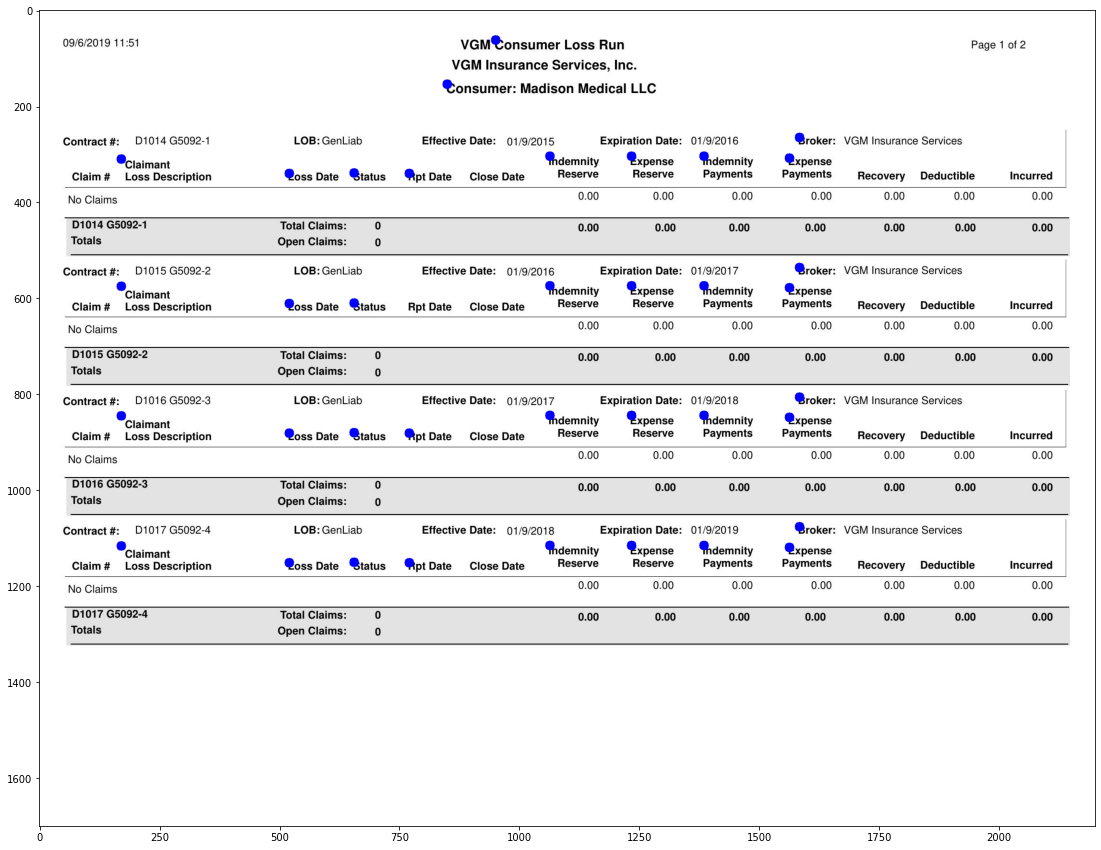

In [22]:
## view results
import cv2

# 
_image_c = cv2.imread(class_1_yes_a_image)

for i in range (len(J)):
    cv2.circle(_image_c,(J[i][0]+1,J[i][1]+1),10,(0,0,255),-1)

plt.figure(figsize=(19,15))
plt.imshow(_image_c)

In [18]:
J


NameError: name 'J' is not defined